## Introduction

With banks processing billions of transactions each day, it becomes a challenge detecting which of those are fraudulent. Fortunatly machine learning techniques can aid in effective detection and in this project I develop an algorithm to predict fraud. To accomplish this task, I use a dataset obtained from Kaggle and uploaded by the ULB Machine Learning Group. 
This dataset contains 284,807 anonymized transactions from 2013, containing a number of fraudulent transactions.Features components transfromed using PCA with the exception of ‘Time’, ‘Amount’, and ‘Class’. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. Feature 'Class' is my desired target variable and it takes value 1 in case of fraud and 0 otherwise. In this project, I test several different supervised learning models for the most accurate detection of fraudulent transactions, including: 
- Native Bayes Classifier
- Knn classifier
- Random Forest
- Decision tree 
- Logistic regression 
- Svm classifier 
- Gradient boosted classifier 

I use gridsearch cv to find the ideal parameters for each of the classifiers I use. I also use a  number of different metrics to evaluate the performance of each of the models. The AUC and ROC plots reveal the positive to false positive rate and helps visually compare the effectiveness of the classifier. I use holdout grouping, cross-validation, and run classification reports on each of the models. 



In [6]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [3]:
# reading in data
credit = pd.read_csv('creditcard.csv')
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [72]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0.5, 1.0, 'Class Distributions')

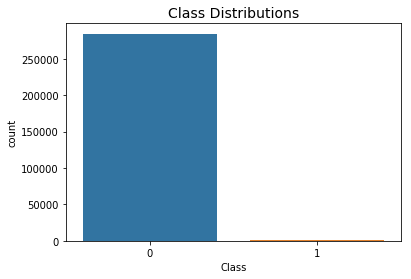

In [71]:
# Highly imbalanced class prediction, shows need for class balancing 
sns.countplot('Class', data=credit)
plt.title('Class Distributions', fontsize=14)


In [19]:
X = credit.loc[:, credit.columns != 'Class']
y = credit.loc[:, credit.columns == 'Class']

In [32]:
# Separate the majority and minority Class.
class_majority = credit[credit.Class==0]
class_minority = credit[credit.Class==1]

In [33]:
# Use downsample of the minority class to address the class imbalance. 
from sklearn.utils import resample

# Downsample majority class sample without replacement to match minority class
credit_maj_downsampled = resample(class_majority, replace=False,n_samples=len(class_minority))    
                                
# Combine minority class with downsampled majority class
credit_downsampled = pd.concat([credit_maj_downsampled, class_minority])

With 20% Holdout: 0.9086294416243654
Testing on Sample: 0.9054878048780488
[0.93       0.94       0.95918367 0.86734694 0.87755102 0.84693878
 0.96938776 0.8877551  0.89795918 0.85714286]
Native Bayes Classification report :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       101
           1       1.00      0.81      0.90        96

   micro avg       0.91      0.91      0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197

AUC: 0.948


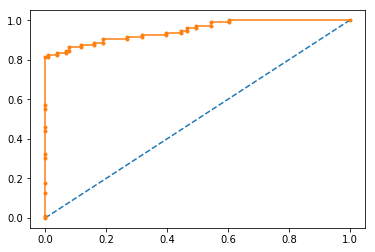

In [65]:
# Native Bayes 

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_subsample = credit_downsampled.loc[:, credit_downsampled.columns != 'Class']
Y_subsample = credit_downsampled['Class']

# Instantiate our model and Fit our model to the data.
bnb = BernoulliNB()
bnb.fit(X_subsample, Y_subsample)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X_subsample,Y_subsample, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(X_subsample, Y_subsample).score(X_subsample, Y_subsample)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(bnb, X_subsample, Y_subsample, cv=10))

#Classification report 
from sklearn.metrics import classification_report
print('Native Bayes Classification report :')
print(classification_report(y_test, bnb.predict(X_test)))

#AUC 
probs = bnb.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


In [73]:
# Model 2: KNN gridsearch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 

# Initialize the model
knn = KNeighborsClassifier()

# Set parameters for KNN
# List of values to try 
knn_params = [{'n_neighbors': [2,3,5,7,10,15,25]}]

#GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, 
    #n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’,
    #error_score=’raise-deprecating’, return_train_score=’warn’)

# Search for the best paramters. 
knn_grid = GridSearchCV(knn, knn_params, cv=7, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
knn_grid.fit(X_subsample, Y_subsample)

# Return best parameters and best score
print(knn_grid.best_params_)
print(knn_grid.best_score_)

Fitting 7 folds for each of 7 candidates, totalling 49 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.9s


{'n_neighbors': 2}
0.4258130081300813


[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    9.7s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


With 20% Holdout: 0.6598984771573604
Testing on Sample: 0.8404471544715447
[0.45       0.44       0.41836735 0.42857143 0.41836735 0.43877551
 0.70408163 0.47959184 0.48979592 0.43877551]
KNN report :
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       101
           1       1.00      0.65      0.78        96

   micro avg       0.83      0.83      0.83       197
   macro avg       0.87      0.82      0.82       197
weighted avg       0.87      0.83      0.82       197

AUC: 0.930


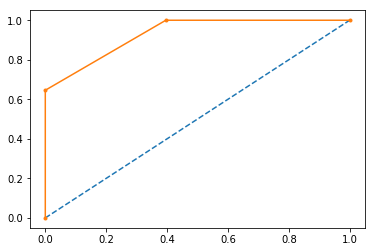

In [66]:
# Nearest neighbors model 
knn = KNeighborsClassifier(n_neighbors=2)

X_subsample = credit_downsampled.loc[:, credit_downsampled.columns != 'Class']
Y_subsample = credit_downsampled['Class']

knn.fit(X,Y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X_subsample,Y_subsample, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(X_subsample, Y_subsample).score(X_subsample, Y_subsample)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, X_subsample, Y_subsample, cv=10))

from sklearn.metrics import classification_report
print('KNN report :')
print(classification_report(y_test, knn.predict(X_test)))

#AUC 
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()



In [45]:
# Model 3: Random Forest gridsearchcv  
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier()

X_subsample = credit_downsampled.loc[:, credit_downsampled.columns != 'Class']
Y_subsample = credit_downsampled['Class']


param_grid = { 
    'n_estimators': [15, 200, 500, 750, 1000, 1500],
    'max_features': [1,2,4,6,7,8],
    'max_depth': [4,5,6,7,8]
}


grid = GridSearchCV(rfc, param_grid, cv=5, verbose=3, n_jobs=-1)

grid.fit(X_subsample, Y_subsample)

# Show the best parameter and best score for unfiltered
print(grid.best_params_)
print( grid.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  9.1min


{'max_depth': 4, 'max_features': 8, 'n_estimators': 15}
0.9359756097560976


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 10.8min finished


With 20% Holdout: 0.9187817258883249
Testing on Sample: 0.9573170731707317
[0.95       0.98       0.97959184 0.87755102 0.90816327 0.93877551
 0.96938776 0.89795918 0.94897959 0.89795918]
Random Forest report :
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       101
           1       0.98      0.88      0.92        96

   micro avg       0.93      0.93      0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

AUC: 0.988


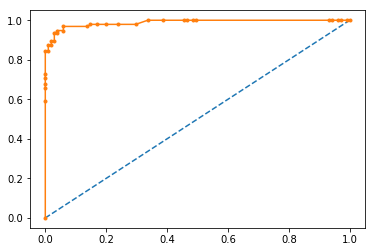

In [67]:
# Random forest model 
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=15, max_features=8, max_depth=4)

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X_subsample,Y_subsample, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(rfc.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfc.fit(X_subsample, Y_subsample).score(X_subsample, Y_subsample)))


# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc, X_subsample, Y_subsample, cv=10))


from sklearn.metrics import classification_report
print('Random Forest report :')
print(classification_report(y_test, rfc.predict(X_test)))


#AUC 
probs = rfc.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


In [47]:

# Logistic Regression Gridsearch cv 
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = (0.0001,0.001, 0.01, 0.1, 1)

# Create hyperparameter options
parameters = dict(C=C, penalty=penalty)

# Use GS-CV to see which alpha level is best.

logr_grid = GridSearchCV(logr, parameters, cv=5, verbose=1)

#Fit the logistic regression 
logr_grid.fit(X_subsample, Y_subsample)

#return best parameters and best score

print(logr_grid.best_params_)
print(logr_grid.best_score_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

{'C': 0.1, 'penalty': 'l1'}
0.9288617886178862


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

With 20% Holdout: 0.9238578680203046
Testing on Sample: 0.9451219512195121
[0.96       0.99       0.96938776 0.87755102 0.8877551  0.96938776
 0.94897959 0.90816327 0.96938776 0.87755102]
Logistic regression report :
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       101
           1       0.96      0.89      0.92        96

   micro avg       0.92      0.92      0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

AUC: 0.978


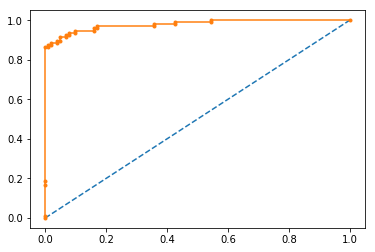

In [68]:
# Logistic regression model 
logr = LogisticRegression(C=.1, penalty='l1')

X_subsample = credit_downsampled.loc[:, credit_downsampled.columns != 'Class']
Y_subsample = credit_downsampled['Class']

logr.fit(X,Y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X_subsample,Y_subsample, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(logr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(logr.fit(X_subsample, Y_subsample).score(X_subsample, Y_subsample)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(logr, X_subsample, Y_subsample, cv=10))

from sklearn.metrics import classification_report
print('Logistic regression report :')
print(classification_report(y_test, logr.predict(X_test)))

#AUC 
probs = logr.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()



In [52]:
# SVM gridsearch best parameters 
from sklearn.svm import SVC

svm = SVC()
X_subsample = credit_downsampled.loc[:, credit_downsampled.columns != 'Class']
Y_subsample = credit_downsampled['Class']

# new parameters for this model
svc_params = [{'C': [.000001,.00001,.001,.01,.1,1,10], 'gamma': [.0001,.001,.01,.1]}]

# setting up the grid
svc_grid = GridSearchCV(svm, svc_params, cv=7, verbose=1, n_jobs=-1)

#Fit the grid
svc_grid.fit(X_subsample, Y_subsample)

#return best parameters and best score

print(svc_grid.best_params_)
print(svc_grid.best_score_)





Fitting 7 folds for each of 28 candidates, totalling 196 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.4s


{'C': 1e-06, 'gamma': 0.001}
0.5


[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    6.4s finished


In [69]:
# SVM model 
from sklearn.svm import SVC
svm = SVC(C=1e-06, gamma=.001)

X_subsample = credit_downsampled.loc[:, credit_downsampled.columns != 'Class']
Y_subsample = credit_downsampled['Class']

svm.fit(X,Y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X_subsample,Y_subsample, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(svm.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(svm.fit(X_subsample, Y_subsample).score(X_subsample, Y_subsample)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm, X_subsample, Y_subsample, cv=10))

from sklearn.metrics import classification_report
print('SVM report :')
print(classification_report(y_test, svm.predict(X_test)))



With 20% Holdout: 0.4873096446700508
Testing on Sample: 0.6097560975609756
[0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.48979592 0.5        0.5       ]
SVM report :
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       101
           1       1.00      0.23      0.37        96

   micro avg       0.62      0.62      0.62       197
   macro avg       0.79      0.61      0.55       197
weighted avg       0.78      0.62      0.56       197



AttributeError: predict_proba is not available when  probability=False

In [57]:
# Parameters to test in gridsearch cv 

X_subsample = credit_downsampled.loc[:, credit_downsampled.columns != 'Class']
Y_subsample = credit_downsampled['Class']

params = {'n_estimators': [50, 100, 150, 200, 300, 500, 700, 1000, 1500],
          'max_depth': [2,3,4,5,6,7,8],
         }

# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier()

# Use the grid
gb_grid = GridSearchCV(gb, params, cv=5, verbose=1, n_jobs=-1)

# Fit the grid
gb_grid.fit(X_subsample, Y_subsample)

# Return best parameters and best score
print(gb_grid.best_params_)
print(gb_grid.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:  2.7min finished


{'max_depth': 4, 'n_estimators': 100}
0.9308943089430894


With 20% Holdout: 0.9035532994923858
Testing on Sample: 1.0
[0.94       0.99       0.96938776 0.8877551  0.8877551  0.94897959
 0.93877551 0.92857143 0.93877551 0.8877551 ]
Gradient Boosting report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        96

   micro avg       1.00      1.00      1.00       197
   macro avg       1.00      1.00      1.00       197
weighted avg       1.00      1.00      1.00       197

AUC: 1.000


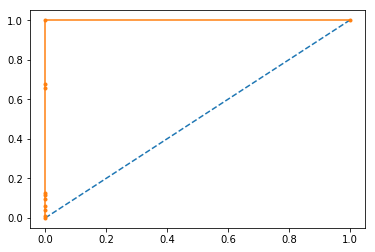

In [70]:
# Gradient boosting model 
# Best Parameters from gridsearchcv 
params = {'n_estimators': 100,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier(**params)

X_subsample = credit_downsampled.loc[:, credit_downsampled.columns != 'Class']
Y_subsample = credit_downsampled['Class']

gb.fit(X,Y)


# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X_subsample,Y_subsample, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(gb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(gb.fit(X_subsample, Y_subsample).score(X_subsample, Y_subsample)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(gb, X_subsample, Y_subsample, cv=10))

from sklearn.metrics import classification_report
print('Gradient Boosting report :')
print(classification_report(y_test, gb.predict(X_test)))

#AUC 
probs = gb.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


In [61]:
# Decision Tree Gridsearch 
from sklearn.tree import DecisionTreeClassifier
X_subsample = credit_downsampled.loc[:, credit_downsampled.columns != 'Class']
Y_subsample = credit_downsampled['Class']

# Initialize the model
decision_tree = DecisionTreeClassifier()

# Set parameters for dtc
params = [{'max_features': [2, 4, 6, 8],
             'max_depth': [2, 4, 6, 8]}]

# Search for the best paramters. 
decision_tree_grid = GridSearchCV(decision_tree, params, cv=5, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
decision_tree_grid.fit(X_subsample, Y_subsample)

# Return best parameters and best score
print(decision_tree_grid.best_params_)
print(decision_tree_grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'max_depth': 4, 'max_features': 6}
0.9247967479674797


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.4s finished


With 20% Holdout: 0.8984771573604061
Testing on Sample: 0.9451219512195121
AUC: 0.966


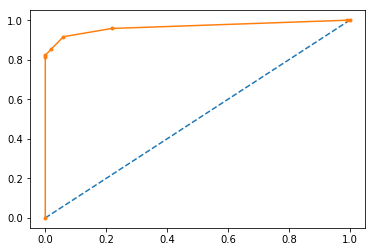

[0.94       0.96       0.94897959 0.85714286 0.82653061 0.90816327
 0.96938776 0.85714286 0.87755102 0.86734694]
Decision Tree report :
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       101
           1       0.98      0.85      0.91        96

   micro avg       0.92      0.92      0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

decision_tree = DecisionTreeClassifier( 
    criterion='entropy',
    max_features=6,
    max_depth=4)

X_subsample = credit_downsampled.loc[:, credit_downsampled.columns != 'Class']
Y_subsample = credit_downsampled['Class']

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X_subsample,Y_subsample, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(X_subsample, Y_subsample).score(X_subsample, Y_subsample)))


# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(decision_tree, X_subsample, Y_subsample, cv=10))


from sklearn.metrics import classification_report
print('Decision Tree report :')
print(classification_report(y_test, decision_tree.predict(X_test)))

#AUC 
probs = decision_tree.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


## Discussion

In looking at the classification report and determining the best performing model, the precision and recall are particularly important. The precision is the ability of the classifier not to label as positive a sample that is negative. The recall is the ability of the classifier to find all the positive samples. Additionally, the

The lowest performing models were the SVM classifier and the Gradient boosted classfiier. The SVM produced test results below 60% on testing sets and at around 60% on the test sets and simply cannot be used. I was surprised by the performance of the gradient booted, I think it was subject to overfittng by producing a perfect test score and showing “perfect skill” in the AUC plot. For this reason, this model also cannot be used.  

The remaining models performed well, with the best being the Random Forest Classifier and the logisitic regression model a close second. The Random Forest classifier had the highest scoring precision value and AUC of 0.988. 


## Conclusion

In performing analysis on this dataset, the main challenge I encountered was the imbalanced class variable. I overcame this challenge by using sckit learn resample to downsample and create a balanced subset of data where the number of fraudulent cases matched the number of non-fradulent cases. This step was important as it helped prevent intense overfitting of my model. In all, the random forest classifier was the best performing model and the model that should be used in fraud detection. 